# Chapter 3: Introduction to Keras and TensorFlow

In [6]:
import numpy as np
import tensorflow as tf

## A linear classifier in pure TensorFlow

### Generate synthetic data

In [2]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)

In [3]:
# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [4]:
# Generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                     np.ones((num_samples_per_class, 1), dtype="float32")))

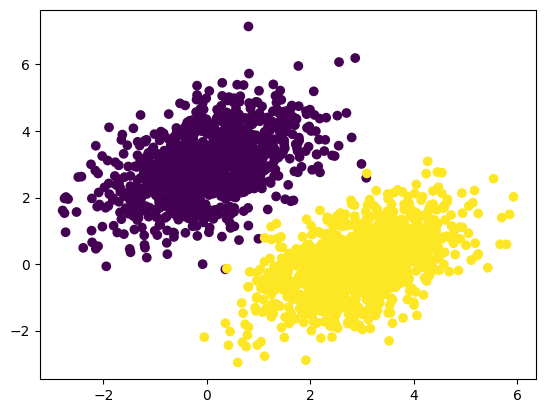

In [5]:
# Plot our data with Matplotlib
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### Create linear classifier

In [7]:
# Creating the linear classifier variables
input_dim = 2 # 2D points
output_dim = 1 # Single score (closer to 0 or 1 based on class)
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [8]:
# Forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [9]:
# Loss function (mean squared error)
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [10]:
# Training step
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

## Batch training

In [11]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 4.0363
loss at step 1: 0.6305
loss at step 2: 0.2042
loss at step 3: 0.1414
loss at step 4: 0.1255
loss at step 5: 0.1162
loss at step 6: 0.1084
loss at step 7: 0.1013
loss at step 8: 0.0948
loss at step 9: 0.0889
loss at step 10: 0.0835
loss at step 11: 0.0785
loss at step 12: 0.0740
loss at step 13: 0.0699
loss at step 14: 0.0660
loss at step 15: 0.0626
loss at step 16: 0.0594
loss at step 17: 0.0565
loss at step 18: 0.0538
loss at step 19: 0.0514
loss at step 20: 0.0491
loss at step 21: 0.0471
loss at step 22: 0.0452
loss at step 23: 0.0435
loss at step 24: 0.0419
loss at step 25: 0.0405
loss at step 26: 0.0392
loss at step 27: 0.0380
loss at step 28: 0.0369
loss at step 29: 0.0359
loss at step 30: 0.0350
loss at step 31: 0.0341
loss at step 32: 0.0334
loss at step 33: 0.0327
loss at step 34: 0.0320
loss at step 35: 0.0314
loss at step 36: 0.0309
loss at step 37: 0.0304
loss at step 38: 0.0299
loss at step 39: 0.0295


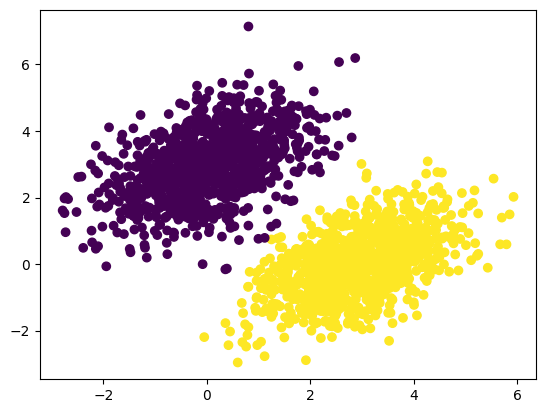

In [12]:
# Visualizing classification
predictions=model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

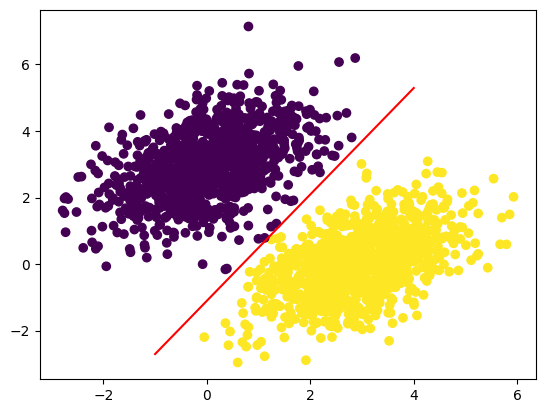

In [13]:
# Plot the classification line
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()